In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
N = 500

def load_data():
    x_train = np.random.randn(N, 2)
    y_train = (x_train[:, 0]*x_train[:, 1] >= 0.) * 2 - 1
    return x_train, y_train

def least_squares(A, b, reg=1.0):
    return np.linalg.inv((A.T @ A) + reg * np.eye(A.shape[1])) @ (A.T @ b)

In [35]:
def confusion_matrix(y_true, y_pred, labels=[]):
    """
    Computes the confusion matrix for a given set of labels.
    Args:
        y_true: The true labels.
        y_pred: The predicted labels.
        labels: The list of labels to consider.
    Returns:
        The confusion matrix. (np.ndarray)
    """
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    for i in range(len(y_pred)):
        x = labels.index(y_true[i])
        y = labels.index(y_pred[i])
        matrix[x, y] += 1
    return matrix

In [36]:
def preprocess_data(x_train):
    a = np.empty((x_train.shape[0],6))
    a[:,0] = 1
    a[:,1:3] = x_train
    a[:,3] = x_train[:,0]*x_train[:,1]
    a[:,4:6] = x_train**2
    return a

In [37]:
x_train, y_train = load_data()
A = preprocess_data(x_train)
x_hat = least_squares(A, y_train)
y_pred = A @ x_hat
y_pred = np.sign(y_pred).astype(np.int32)

In [38]:
err = np.mean(y_pred != y_train)
print(f"Error: {err*100:.2f}%")

Error: 11.20%


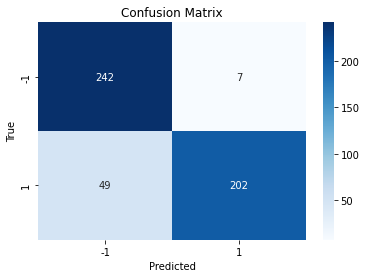

In [39]:
cnf_matrix = confusion_matrix(y_train, y_pred, labels=[-1, 1])
sns.heatmap(cnf_matrix, xticklabels=[
                '-1', '1'], yticklabels=['-1', '1'], annot=True, fmt="d",cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

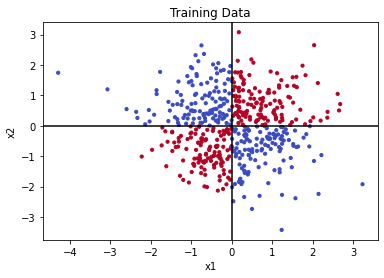

In [40]:
fig,ax = plt.subplots()
ax.scatter(x_train[:,0], x_train[:,1], c=y_train, s=10, cmap='coolwarm')
# ax.grid(True,which = 'both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("Training Data")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

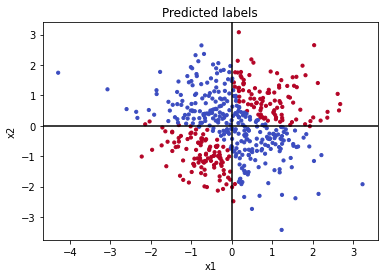

In [41]:
fig,ax = plt.subplots()
ax.scatter(x_train[:,0], x_train[:,1], c=y_pred, s=10, cmap='coolwarm')
# ax.grid(True,which = 'both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("Predicted labels")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

In [42]:
POINTS = 100000
x_test = np.random.randn(POINTS, 2)
y_test = (x_test[:, 0]*x_test[:, 1] >= 0.) * 2 - 1
A_test = preprocess_data(x_test)
y_hat = A_test @ x_hat
y_hat = np.sign(y_hat).astype(np.int32)

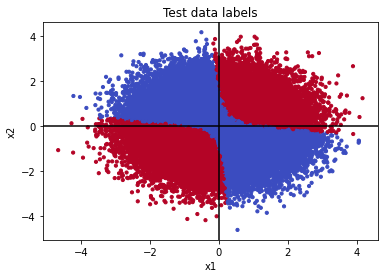

In [43]:
fig,ax = plt.subplots()
ax.scatter(x_test[:,0], x_test[:,1], c=y_hat, s=10, cmap='coolwarm')
# ax.grid(True,which = 'both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("Test data labels")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

In [45]:
x_hat

array([-0.09002804, -0.02761303, -0.0305592 ,  0.63977871,  0.07141406,
        0.04440117])